# Predictions on different data quality

## Parameters and model

In [1]:
import sys

sys.path.append('..')
from timeseries.timeseries import StockMarketSeries
from timeseries.utils import SeriesColumn, DeviationSource
from predictions.model import PredictionModel

company_name = "Apple"
path = "../data/timeseries/apple.csv"
time_series_start = 0
time_series_end = 180
column = SeriesColumn.CLOSE
stock = StockMarketSeries(company_name, path, time_series_start, time_series_end,
                           weights={SeriesColumn.OPEN: 0.2,
                                    SeriesColumn.CLOSE: 0.2,
                                    SeriesColumn.ADJ_CLOSE: 0.25,
                                    SeriesColumn.HIGH: 0.15,
                                    SeriesColumn.LOW: 0.15,
                                    SeriesColumn.VOLUME: 0.05})

## Data - one price column

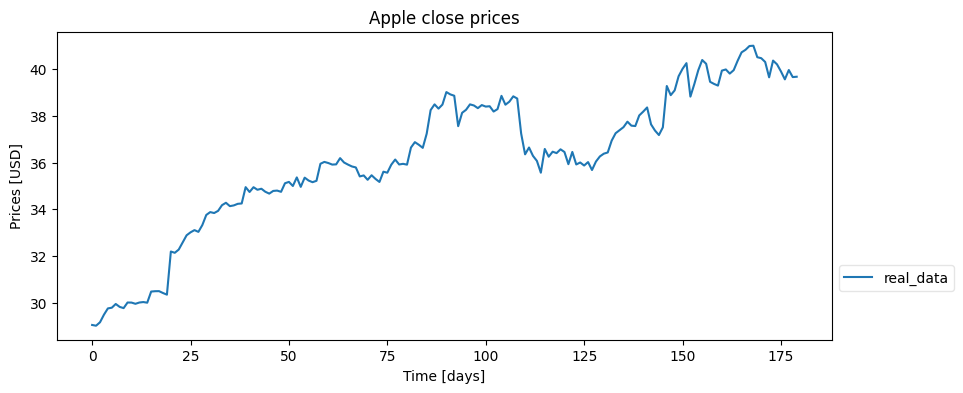

In [2]:
stock.plot_series("close prices", real_data=stock.real_series[SeriesColumn.CLOSE])

## Predictions parameters

In [3]:
prediction_start = 160
iterations = 3

model = PredictionModel(stock, prediction_start, column, iterations=iterations)

## Statistical methods

In [4]:
from arima import ManualArima

arima_type = ManualArima

## AR(5)

In [5]:
arima = model.configure_model(arima_type, p=5, q=0)

C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\predictio

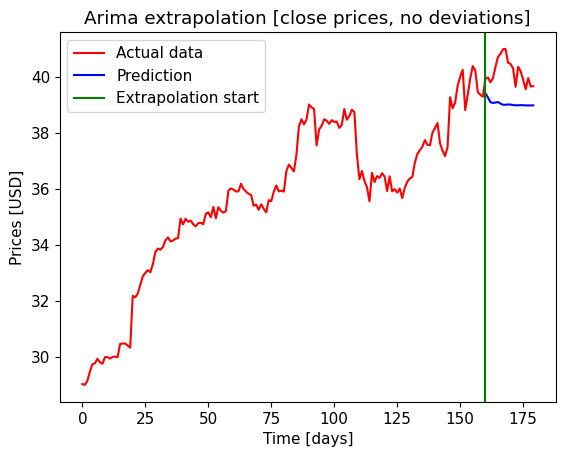

In [6]:
%%capture --no-stdout --no-display
arima.plot_prediction(source=DeviationSource.NONE)

In [7]:
%%capture --no-stdout --no-display
arima.compute_statistics_set()

Statistics [Apple stock, close price, 3 iterations]

  Deviation Scale     Time Time SD  RMSE   MAE  MAPE MAPE SD
0         -     -   824.17    9.35  1.23  1.14  2.82     0.0
1         N     S   712.09   26.48  0.92   0.8  1.97     0.0
2         N     M   687.69   37.38  1.26  1.18  2.91     0.0
3         N     H  1639.07    39.7  2.49  2.41  5.99     0.0
4         I     S   751.63   18.77  1.28  1.19  2.95     0.0
5         I     M    693.6   11.55  0.65   0.5  1.24     0.0
6         I     H   723.12   27.98  1.24  1.16  2.86     0.0
7         T     S   800.34   31.34  1.23  1.14  2.82     0.0
8         T     M   801.17   40.31  1.23  1.14  2.82     0.0
9         T     H   786.61   17.78  1.23  1.14  2.82     0.0
\begin{tabular}{llllllll}
\toprule
Deviation & Scale &    Time & Time SD & RMSE &  MAE & MAPE & MAPE SD \\
\midrule
        - &     - &  824.17 &    9.35 & 1.23 & 1.14 & 2.82 &    0.00 \\
        N &     S &  712.09 &   26.48 & 0.92 & 0.80 & 1.97 &    0.00 \\
        N &     

## ARIMA(5,1,5)

In [8]:
arima = model.configure_model(arima_type, p=5, q=2)

C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\predictio

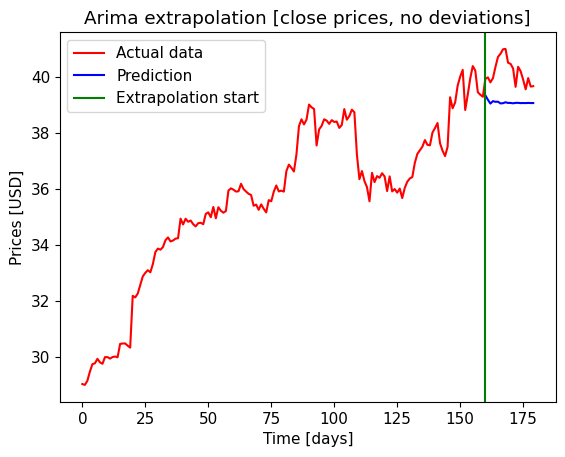

In [9]:
%%capture --no-stdout --no-display
arima.plot_prediction(source=DeviationSource.NONE)

In [10]:
%%capture --no-stdout --no-display
arima.compute_statistics_set()

Statistics [Apple stock, close price, 3 iterations]

  Deviation Scale     Time Time SD  RMSE   MAE  MAPE MAPE SD
0         -     -   1874.9   39.63  1.19   1.1  2.71     0.0
1         N     S  1799.59   70.19  0.94  0.82  2.03     0.0
2         N     M  3500.16   55.31  1.21  1.06  2.62     0.0
3         N     H   4145.9  237.04  1.31   1.2  2.98     0.0
4         I     S   4582.3  852.96  1.23  1.16  2.87     0.0
5         I     M  5026.22  160.78  0.85  0.72  1.79     0.0
6         I     H  4121.83  137.78  1.13  1.04  2.58     0.0
7         T     S  1683.43   84.11  1.19   1.1  2.71     0.0
8         T     M   1666.7   71.86  1.19   1.1  2.71     0.0
9         T     H  1769.68   29.92  1.19   1.1  2.71     0.0
\begin{tabular}{llllllll}
\toprule
Deviation & Scale &    Time & Time SD & RMSE &  MAE & MAPE & MAPE SD \\
\midrule
        - &     - & 1874.90 &   39.63 & 1.19 & 1.10 & 2.71 &    0.00 \\
        N &     S & 1799.59 &   70.19 & 0.94 & 0.82 & 2.03 &    0.00 \\
        N &     

## XGBoost

In [11]:
from ml import XGBoost

xgboost = model.configure_model(XGBoost, optimize=False)

C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\predictio

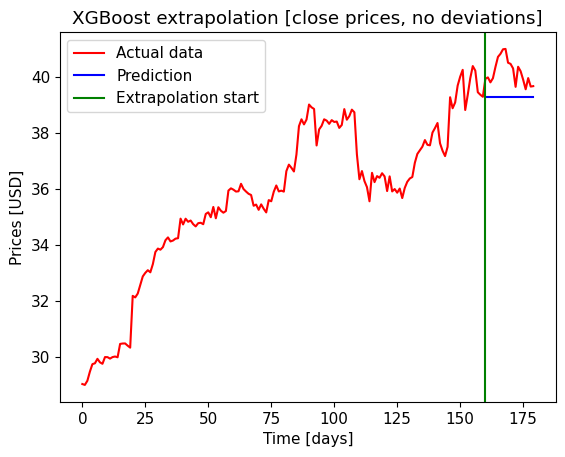

In [12]:
xgboost.plot_prediction(source=DeviationSource.NONE)

In [13]:
%%capture --no-stdout --no-display
xgboost.compute_statistics_set()

Statistics [Apple stock, close price, 3 iterations]

  Deviation Scale   Time Time SD  RMSE   MAE  MAPE MAPE SD
0         -     -  48.34    2.21   1.0   0.9  2.22     0.0
1         N     S  57.51    8.64  0.64   0.5  1.23     0.0
2         N     M  57.42    9.14  1.15  1.06  2.62     0.0
3         N     H  50.94    6.71  1.85  1.79  4.45     0.0
4         I     S  41.79     8.8   1.0   0.9  2.22     0.0
5         I     M  41.92    8.91  0.86  0.74  1.82     0.0
6         I     H  36.58    9.25   1.0   0.9  2.22     0.0
7         T     S  49.34    4.01   1.0   0.9  2.22     0.0
8         T     M  36.59    8.91   1.0   0.9  2.22     0.0
9         T     H  41.79     8.8   1.0   0.9  2.22     0.0
\begin{tabular}{llllllll}
\toprule
Deviation & Scale &  Time & Time SD & RMSE &  MAE & MAPE & MAPE SD \\
\midrule
        - &     - & 48.34 &    2.21 & 1.00 & 0.90 & 2.22 &    0.00 \\
        N &     S & 57.51 &    8.64 & 0.64 & 0.50 & 1.23 &    0.00 \\
        N &     M & 57.42 &    9.14 & 1.15 &

## Reservoir computing

In [14]:
from predictions.ml import Reservoir

reservoir = model.configure_model(Reservoir)

C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\prediction.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_to_learn_and_validate = self.data_to_learn.append(self.data_to_validate)
C:\Users\Maciek\Desktop\Magisterka\project\predictions\..\predictions\predictio

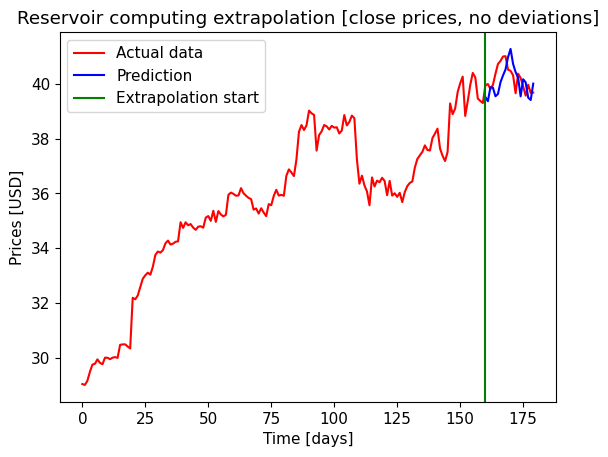

In [15]:
reservoir.plot_prediction(source=DeviationSource.NONE)

In [17]:
%%capture --no-stdout --no-display
reservoir.compute_statistics_set()

_LinAlgError: linalg.svd: The algorithm failed to converge because the input matrix is ill-conditioned or has too many repeated singular values (error code: 14).